### Подключение библиотек и скриптов

In [62]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [51]:
PREPARED_TRAIN_PATH = 'train_prepared.csv'
PREPARED_TRAIN_LSNAN_PATH = 'train_prepared_lsnan.csv'
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_TRAIN_PATH = 'model.pkl' 

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1**, **Ecology_2**, **Ecology_3** - экологические показатели местности
* **Social_1**, **Social_2**, **Social_3** - социальные показатели местности
* **Healthcare_1**, **Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1**, **Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

# Random Forest

# ФИНАЛ

In [ ]:
df=pd.read_csv('../train_1_artem.csv')
X1=df.drop('Price', axis=1).copy()
X1=pd.get_dummies(X1)
X1.info()


In [52]:
# https://www.kaggle.com/c/realestatepriceprediction/leaderboard
df=pd.read_csv(PREPARED_TRAIN_PATH)
X1=df.drop('Price', axis=1).copy()
X1=pd.get_dummies(X1)
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Ecology_2_A    10000 non-null  uint8  
 17  Ecology_2_B    10000 non-null  uint8  
 18  Ecology

In [53]:
#X=X1[['DistrictId', 'Rooms', 'Square', 'KitchenSquare','HouseFloor','HouseYear','Ecology_1','Social_1', 'Social_2','Social_3','Helthcare_2','Shops_1','Ecology_2_A','Ecology_2_B','Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B']]
X=X1[['DistrictId', 'Rooms', 'Square', 'KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1', 'Social_2','Social_3','Helthcare_2']]

X

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2
0,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,33,7976,5,0
1,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,46,10309,1,1
2,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,34,7759,0,1
3,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,23,5735,3,0
4,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,35,5776,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,5.0,6,5.0,1968,0.135650,46,7960,6,3
9996,18,1.0,41.521546,9.0,13,13.0,2000,0.000000,30,5562,0,0
9997,27,1.0,47.939008,1.0,12,16.0,2015,0.072158,2,629,1,0
9998,75,2.0,43.602562,8.0,1,5.0,1961,0.307467,30,5048,9,2


In [54]:
y=df['Price']
y

0       184966.930730
1       300009.450063
2       220925.908524
3       175616.227217
4       150226.531644
            ...      
9995    196684.316040
9996    189050.289571
9997    159143.805370
9998    181595.339808
9999    218714.077615
Name: Price, Length: 10000, dtype: float64

In [55]:
# разобьем наш датасет , презназначенный для обучения колонки LifeSquare на два датасета (обучающего и валидного)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=50)
X_train

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2
5189,58,1.0,43.230274,1.0,13,17.0,1977,0.437885,23,5735,3,0
7969,101,1.0,31.857473,5.0,3,9.0,1966,0.225825,41,6558,7,3
9039,58,1.0,44.063070,1.0,3,1.0,1977,0.437885,23,5735,3,0
5208,48,1.0,41.812188,8.0,2,12.0,1981,0.041125,46,9515,5,1
506,23,1.0,105.432181,0.0,3,2.0,1977,0.014073,2,475,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8262,27,1.0,40.422035,1.0,8,17.0,2016,0.011654,4,915,0,0
6214,31,3.0,50.914858,4.0,4,4.0,1960,0.151346,32,5889,10,4
8324,30,2.0,66.144841,1.0,8,17.0,1977,0.000078,22,6398,141,3
6253,19,1.0,42.674884,10.0,4,16.0,1978,0.309479,35,7715,4,0


In [56]:
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'n_estimators': [150,200, 250],
    'max_features': np.arange(3, 6),
    'max_depth': np.arange(10, 12),
}

regr = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
regr

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [63]:
regr = RandomForestRegressor(max_depth=11, n_estimators=250, max_features=3, random_state=50)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
r2_score(y_train, y_pred)

0.8685995690298893

In [64]:
y_valid_pred = regr.predict(X_valid)
r2_score(y_valid, y_valid_pred)

0.7488109805512833

In [65]:
# сохраним модель
with open(MODEL_TRAIN_PATH, 'wb') as file:
    pickle.dump(regr, file)

### Обучим тестовые данные

In [66]:
# прочитаем нашу ранее сохраненную модель  
with open(MODEL_TRAIN_PATH, 'rb') as file:
    model=pickle.load(file)

In [67]:
# устанавливаем колонку id  как индекс у данных train
dfTest = pd.read_csv(TEST_DATASET_PATH)
dfTest.set_index("Id", inplace=True)
dfTest.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [68]:

dfTest.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [69]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

### Количественные признаки

In [70]:
df_test1=dfTest.copy()

In [71]:
dfTest_num_features = dfTest.select_dtypes(include=['float64','int64'])
dfTest_num_features.corr()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
DistrictId,1.000000,0.048620,-0.037734,-0.063092,0.075354,-0.130514,-0.151899,-0.210673,0.080369,0.221359,0.145558,0.131288,0.314152,0.277480,0.157297
Rooms,0.048620,1.000000,0.737178,0.560738,0.055058,-0.022866,-0.008065,-0.022069,-0.012659,0.070414,0.068312,-0.006876,0.026028,0.028808,0.036813
Square,-0.037734,0.737178,1.000000,0.710879,0.043994,0.112994,0.134888,0.221221,-0.055763,-0.086439,-0.052063,0.003502,-0.062007,-0.068009,-0.010220
LifeSquare,-0.063092,0.560738,0.710879,1.000000,0.006437,0.087459,0.120507,0.206685,-0.055910,-0.127617,-0.097183,0.033452,-0.052566,-0.071425,-0.014497
KitchenSquare,0.075354,0.055058,0.043994,0.006437,1.000000,-0.011754,0.072769,0.074535,0.004132,0.131234,0.120183,-0.037653,0.021674,0.077121,0.029707
Floor,-0.130514,-0.022866,0.112994,0.087459,-0.011754,1.000000,0.463441,0.280718,-0.027548,-0.041018,-0.005598,0.007108,-0.119675,-0.048595,0.042854
HouseFloor,-0.151899,-0.008065,0.134888,0.120507,0.072769,0.463441,1.000000,0.418111,-0.036547,-0.035906,-0.002948,-0.027500,-0.161227,-0.079672,0.017493
HouseYear,-0.210673,-0.022069,0.221221,0.206685,0.074535,0.280718,0.418111,1.000000,-0.074931,-0.057470,0.006975,-0.074811,-0.247141,-0.130654,-0.017997
Ecology_1,0.080369,-0.012659,-0.055763,-0.055910,0.004132,-0.027548,-0.036547,-0.074931,1.000000,0.016759,0.001057,-0.120340,-0.023860,0.024136,-0.075825
Social_1,0.221359,0.070414,-0.086439,-0.127617,0.131234,-0.041018,-0.035906,-0.057470,0.016759,1.000000,0.955823,0.019577,0.045427,0.517356,0.528970


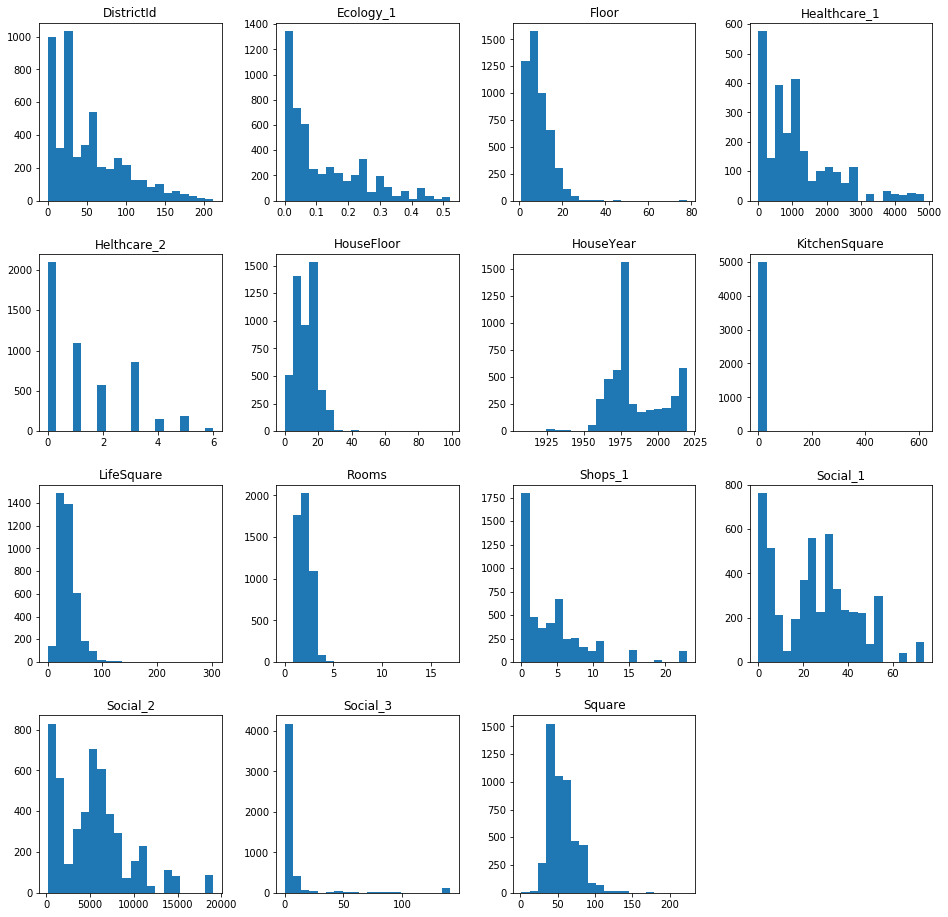

In [72]:
dfTest_num_features.hist(figsize=(16,16), bins=20, grid=False);

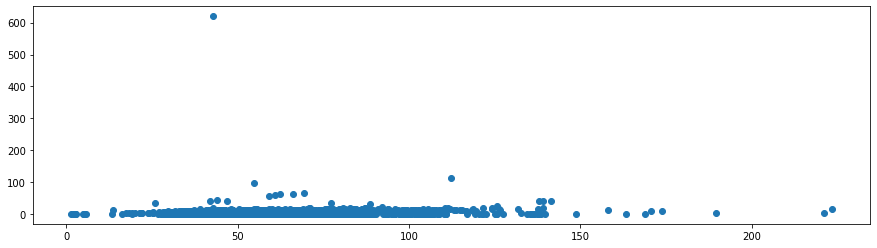

In [73]:
# посмотрим насколько коррелируют  колонки Square и KitchenSquare
#df_notNan_ls
plt.rcParams['figure.figsize'] = 15, 4
plt.scatter(dfTest['Square'],dfTest['KitchenSquare'])

In [74]:
# на графике мы видим выброс ОШИБОЧНЫЙ ( скорей всего опечатка) по колонке LifeSquare 
# , т.к. общая площать  81.694417 а жилая 7480.592129

dfTest[dfTest['KitchenSquare']>500]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14594,11,2.0,42.795304,24.22377,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B


In [75]:
 # еще посмтрим значения когда кухня больше обшей площади
dfTest[dfTest['KitchenSquare']>dfTest['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [76]:
# заменяем  некоректные данные по метражу кухонь на 0.3 от общей плащади
dfTest.loc[dfTest['KitchenSquare']>dfTest['Square'],'KitchenSquare']=dfTest.loc[dfTest['KitchenSquare']>dfTest['Square'],'Square']* 0.3

In [77]:
 # еще  раз посмотрим значения когда кухня больше обшей площади. Видим таких значений больше нет. отлично
dfTest[dfTest['KitchenSquare']>dfTest['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


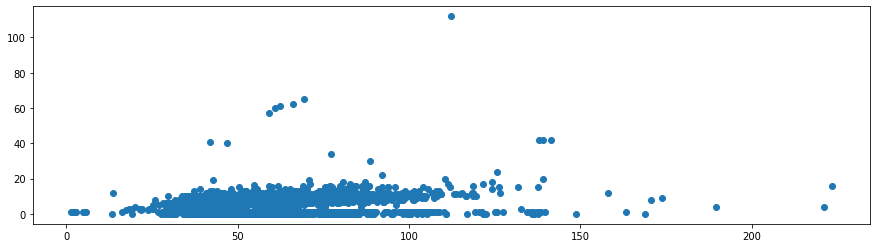

In [78]:
# посмотрим насколько коррелируют  колонки Square и KitchenSquare
#
plt.rcParams['figure.figsize'] = 15, 4
plt.scatter(dfTest['Square'],dfTest['KitchenSquare'])

(array([  10.,   18.,   20.,    8.,  357., 1056., 1819.,  378.,  430.,
         904.]),
 array([1908. , 1919.2, 1930.4, 1941.6, 1952.8, 1964. , 1975.2, 1986.4,
        1997.6, 2008.8, 2020. ]),
 <a list of 10 Patch objects>)

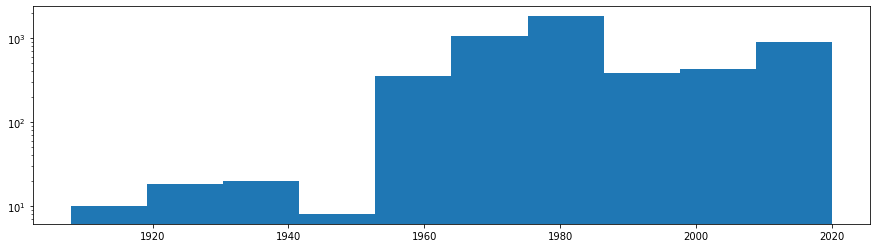

In [79]:
# смотрим колонку HouseYear
plt.hist(dfTest['HouseYear'], log=True)

# даты здесь вполне корректные

In [80]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [81]:
dfTest.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.828038,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,17.825287,4.637910,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,112.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [82]:
X1Test=pd.get_dummies(dfTest)
X1Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Social_1       5000 non-null   int64  
 10  Social_2       5000 non-null   int64  
 11  Social_3       5000 non-null   int64  
 12  Healthcare_1   2623 non-null   float64
 13  Helthcare_2    5000 non-null   int64  
 14  Shops_1        5000 non-null   int64  
 15  Ecology_2_A    5000 non-null   uint8  
 16  Ecology_2_B    5000 non-null   uint8  
 17  Ecology_3_A    5000 non-null   uint8  
 18  Ecolo

In [83]:
XTest=X1Test[['DistrictId', 'Rooms', 'Square', 'KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1', 'Social_2','Social_3','Helthcare_2']]

XTest

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2
Id,,,,,,,,,,,,
725,58,2.0,49.882643,6.0,6,14.0,1972,0.310199,11,2748,1,0
15856,74,2.0,69.263183,1.0,6,1.0,1977,0.075779,6,1437,3,0
5480,190,1.0,13.597819,12.0,2,5.0,1909,0.000000,30,7538,87,5
15664,47,2.0,73.046609,9.0,22,22.0,2007,0.101872,23,4583,3,3
14275,27,1.0,47.527111,1.0,17,17.0,2017,0.072158,2,629,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,6.0,5,9.0,1973,0.000170,36,5992,0,1
4695,1,1.0,40.198472,10.0,12,17.0,2017,0.007122,1,264,0,0
5783,12,3.0,77.842178,9.0,23,22.0,1989,0.090799,74,19083,2,5


In [100]:
Price_pred = model.predict(XTest)
Price_pred

array([180912.58239845, 223297.90343092, 241191.6427908 , ...,
       333240.93963093, 198491.21094554, 178688.13556686])

In [108]:
pd_price=pd.DataFrame({'Price':Price_pred})

In [109]:
pd_price.describe()

,Price
count,5000.000000
mean,214821.690922
std,72483.459456
min,67269.390570
25%,168846.418163
50%,197064.329861
75%,247522.923526
max,537840.104807


In [112]:
df.describe()['Price']

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [122]:
pd_Price=pd.DataFrame({'Id': dfTest.index, 'Price':Price_pred})
pd_Price

,Id,Price
0,725,180912.582398
1,15856,223297.903431
2,5480,241191.642791
3,15664,311353.993910
4,14275,139440.291337
...,...,...
4995,8180,240238.361358
4996,4695,136586.729763
4997,5783,333240.939631
4998,4780,198491.210946


In [121]:
pd_Price.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,214821.690922
std,4832.674037,72483.459456
min,1.000000,67269.390570
25%,4221.750000,168846.418163
50%,8320.500000,197064.329861
75%,12598.250000,247522.923526
max,16795.000000,537840.104807


In [126]:
# сохраняем препарированную базу без добавления обученых LifeSquare
pd_Price.to_csv('AKolyvanov_predictions.csv', index=False, encoding='utf-8')

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,e
Id,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,403249.147105
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,NaN
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,NaN
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,NaN
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,NaN
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,179692.525103
5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,NaN


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B


numpy.ndarray